# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [10]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


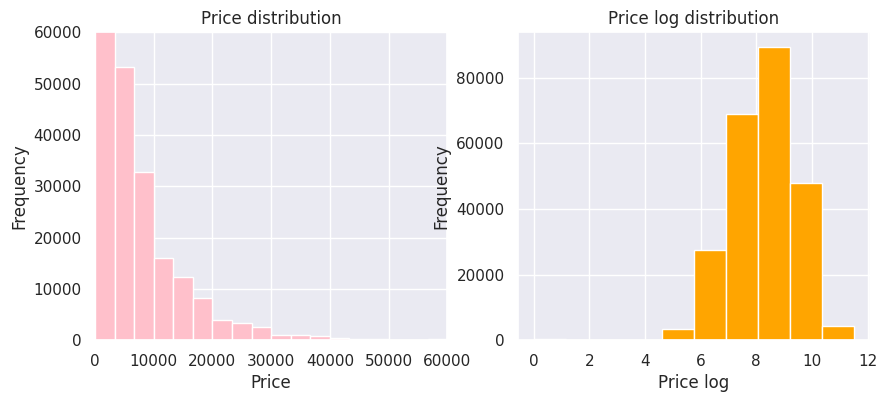

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(data['price'], label='without log', color='pink', bins=30)
axes[0].set_xlabel('Price')
axes[0].set_xlim(0, 60000)
axes[0].set_ylim(0, 60000)
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price distribution')

axes[1].hist(np.log(data['price']), label='log', color='orange')
axes[1].set_xlabel('Price log')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Price log distribution')

plt.grid(True)
plt.show()

### Ответ: да, таргет стоит заменить на его логарифм, поскольку
    - он помогает нормализовать его распределение
    - снижает влияние выбросов

In [12]:
data['log_price']=np.log(data['price'])

In [13]:
data['price'].quantile(0.99)

37900.0

In [14]:
data.loc[data['price']>37900]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
26,bmw,andere,coupe,automatik,benzin,nein,306,30000,21,39600,10.586584
81,mercedes_benz,glk,suv,automatik,diesel,nein,204,40000,19,41900,10.643041
163,audi,a6,limousine,automatik,diesel,nein,326,5000,9,56900,10.949051
165,mercedes_benz,andere,coupe,automatik,diesel,nein,265,80000,18,48000,10.778956
298,bmw,x_reihe,limousine,automatik,diesel,nein,245,40000,36,43900,10.689670
...,...,...,...,...,...,...,...,...,...,...,...
240843,audi,tt,coupe,automatik,benzin,nein,360,30000,24,39900,10.594132
240879,mercedes_benz,e_klasse,coupe,automatik,benzin,nein,408,80000,33,44999,10.714396
241012,land_rover,defender,suv,manuell,diesel,nein,122,5000,1,69900,11.154821
241034,mercedes_benz,a_klasse,limousine,automatik,benzin,nein,360,5000,13,54000,10.896739


In [15]:
data[data['price']==99999]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
92147,nissan,x_trail,suv,manuell,diesel,nein,114,150000,175,99999,11.512915
96067,porsche,911,cabrio,automatik,benzin,nein,400,20000,33,99999,11.512915
204347,porsche,911,coupe,manuell,benzin,ja,325,150000,142,99999,11.512915
222159,smart,fortwo,kleinwagen,automatik,benzin,nein,71,50000,78,99999,11.512915


In [16]:
data.drop([92147, 222159], axis=0, inplace=True, errors='ignore') #smart and nissan kicked

In [17]:
display(data[data['log_price']==0])
data[data['log_price']==0].describe()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
47,mercedes_benz,e_klasse,limousine,manuell,diesel,nein,113,150000,252,1,0.0
167,audi,80,limousine,manuell,benzin,nein,90,70000,309,1,0.0
649,opel,omega,kombi,manuell,benzin,nein,136,150000,219,1,0.0
1291,jaguar,x_type,limousine,automatik,diesel,nein,241,30000,31,1,0.0
1780,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,214,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
237269,volkswagen,polo,kleinwagen,manuell,benzin,nein,55,150000,237,1,0.0
239537,opel,astra,coupe,automatik,benzin,nein,102,150000,195,1,0.0
240184,nissan,andere,bus,manuell,diesel,ja,101,150000,134,1,0.0
240209,volkswagen,polo,kleinwagen,manuell,benzin,nein,125,150000,208,1,0.0


,powerPS,kilometer,autoAgeMonths,price,log_price
count,274.000000,274.000000,274.000000,274.0,274.0
mean,128.678832,134470.802920,198.638686,1.0,0.0
std,53.569021,38937.268343,67.398037,0.0,0.0
min,51.000000,5000.000000,8.000000,1.0,0.0
25%,90.000000,150000.000000,160.500000,1.0,0.0
50%,117.500000,150000.000000,201.000000,1.0,0.0
75%,153.750000,150000.000000,224.000000,1.0,0.0
max,400.000000,150000.000000,545.000000,1.0,0.0


In [18]:
data=data[data['log_price']!=0] #удалены записи, у которых 'log_price' равен 0

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [19]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

Корреляция powerPS c log_price: 0.5503812552547301
Корреляция autoAgeMonths c log_price: -0.6402642665382225


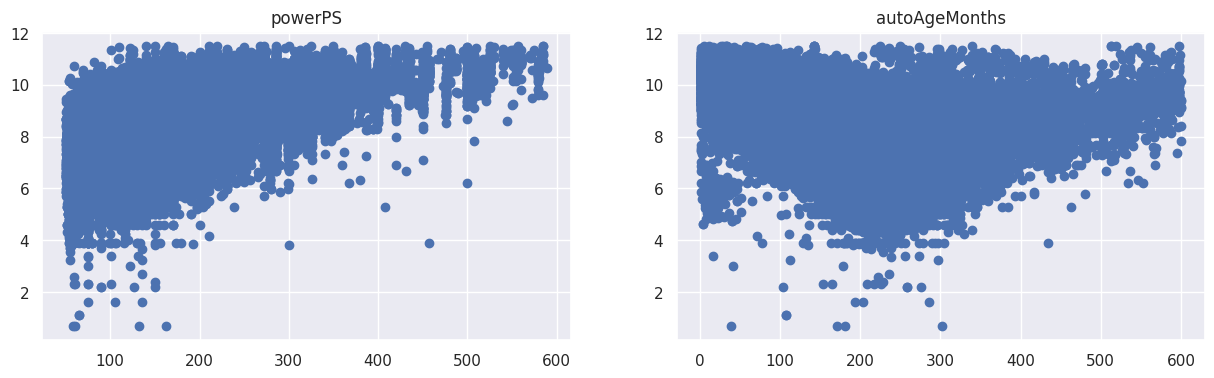

In [20]:
# графики численных фичей
target = data['log_price']
num_features = ['powerPS', 'autoAgeMonths']
fig, axes = plt.subplots(1, len(num_features), figsize=(15, 4))

for i, feature in enumerate(num_features):
    axes[i].scatter(data[feature], target)
    axes[i].set_title(feature)
    print(f'Корреляция {feature} c log_price:', data[feature].corr(target))

plt.grid(True)
plt.show()

In [21]:
print(f'Корреляция log(powerPS) c log_price:', np.log(data['powerPS']).corr(target))
print(f'Корреляция log(autoAgeMonths) c log_price:', np.log(data['autoAgeMonths']).corr(target))

Корреляция log(powerPS) c log_price: 0.5706576816355149
Корреляция log(autoAgeMonths) c log_price: -0.6691858342634981


In [22]:
data['kilometer'].unique()

array([150000,  90000,  70000, 100000,  60000,  20000, 125000,  30000,
        80000,  50000,  40000,  10000,   5000])

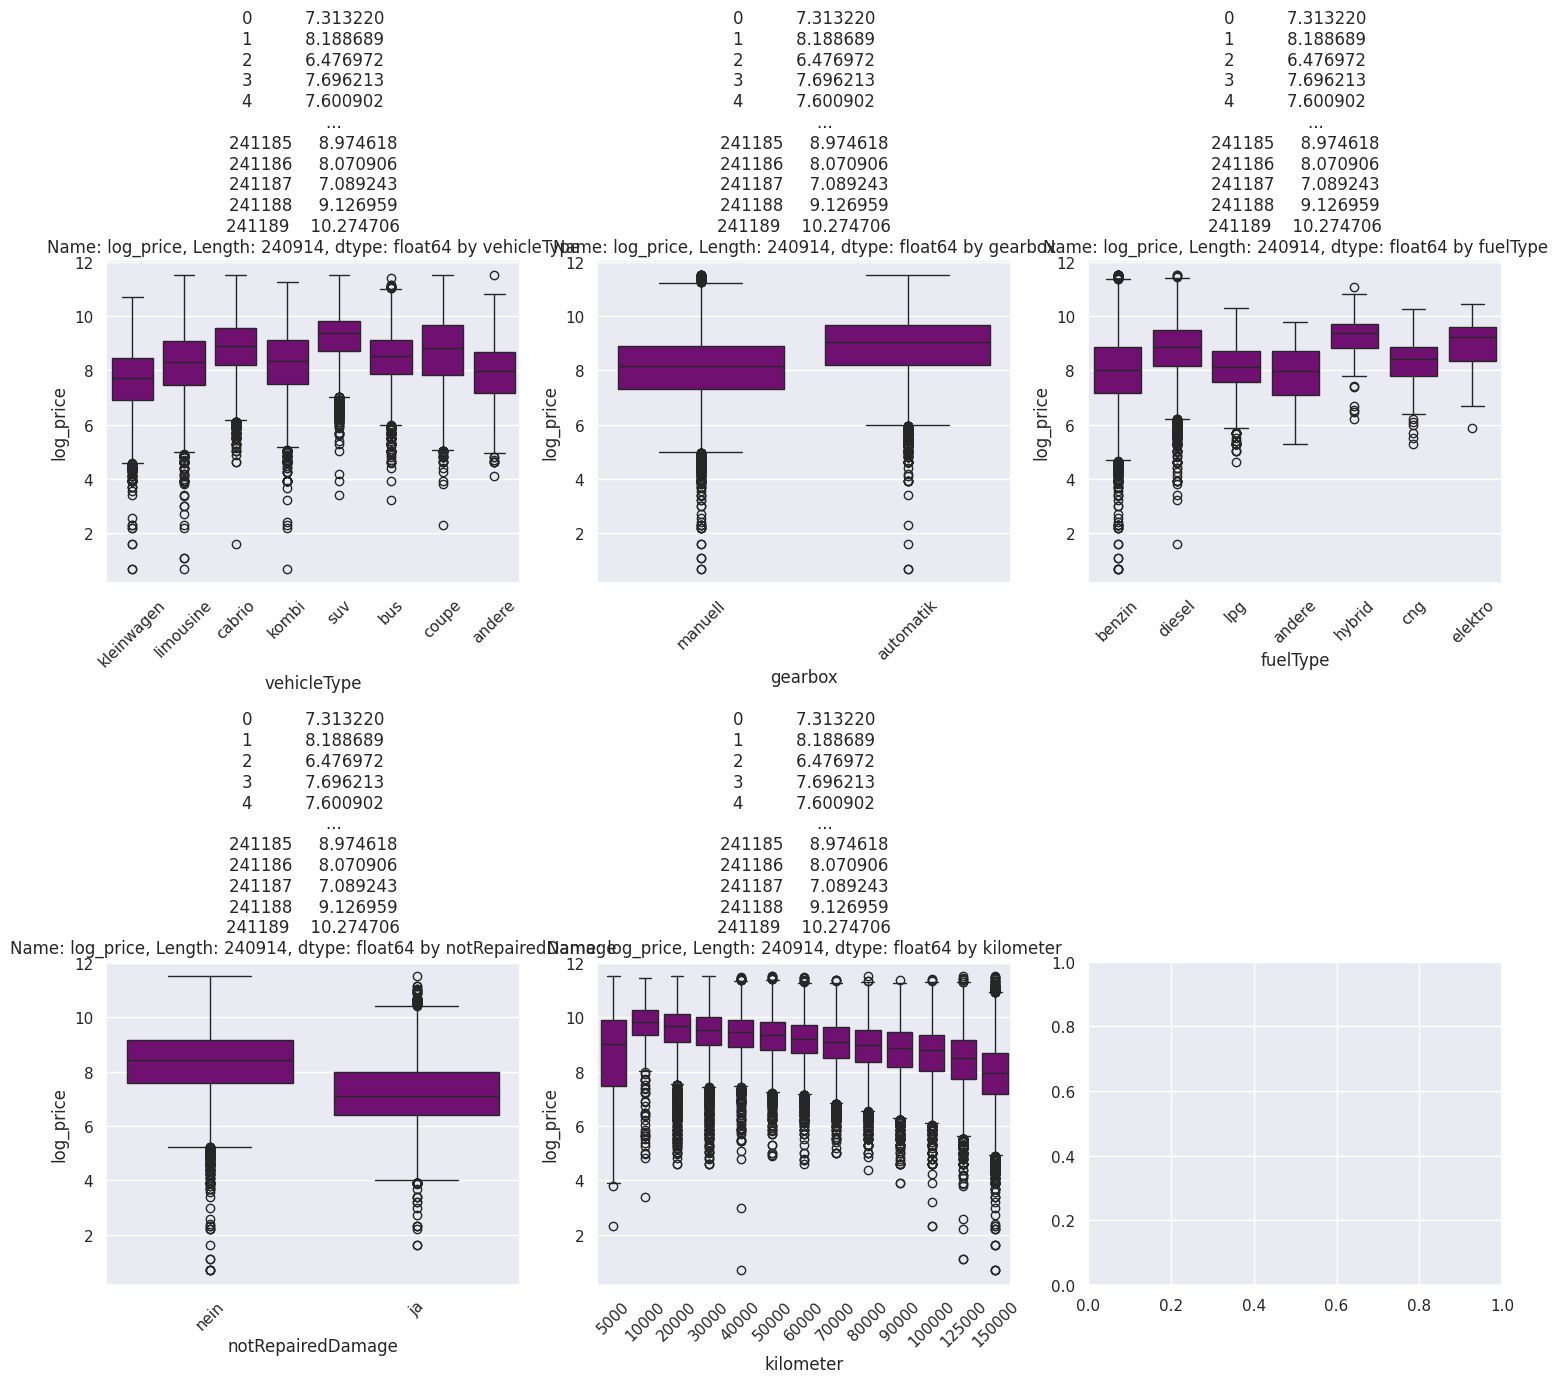

In [23]:
# графики категориальных фичей
cat_features = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'kilometer']

cols = 3  

fig, axes = plt.subplots(2, cols, figsize=(5 * cols, 7*2))
axes = axes.flatten()  

for i, feature in enumerate(cat_features):
    sns.boxplot(x=feature, y=target, data=data, ax=axes[i], color='purple')
    axes[i].set_title(f'{target} by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

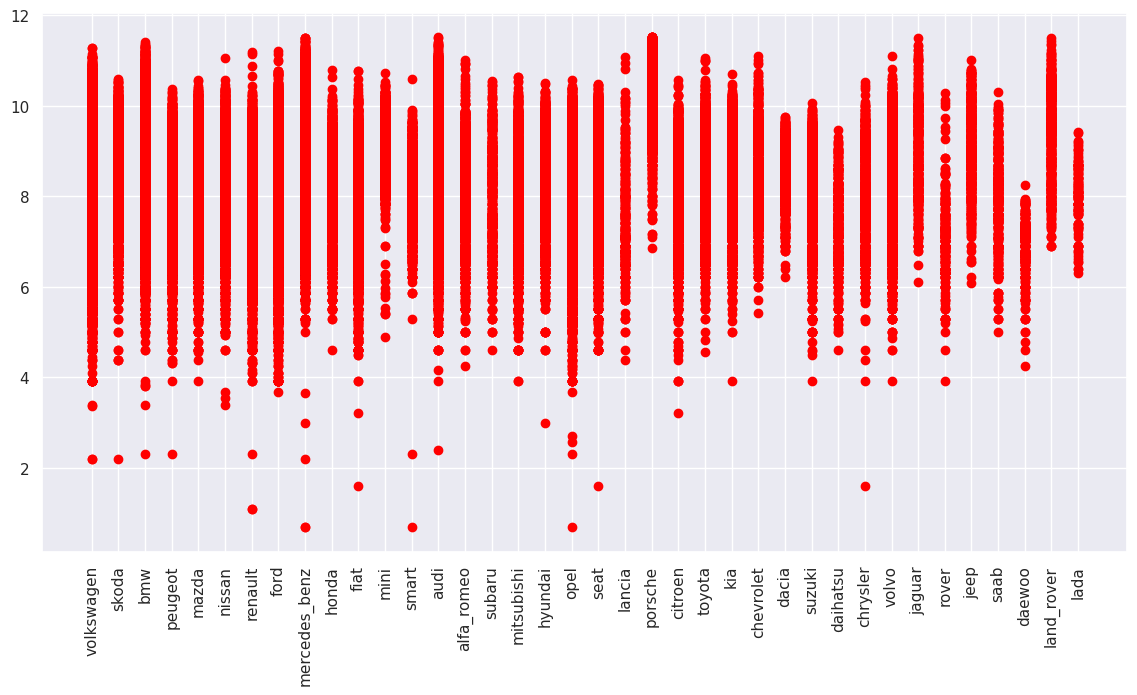

In [24]:
plt.figure(figsize=[14, 7])
plt.scatter(data['brand'], target, color='red')
axes[i].tick_params(axis='x', rotation=45)
plt.tick_params(axis='x', rotation=90)

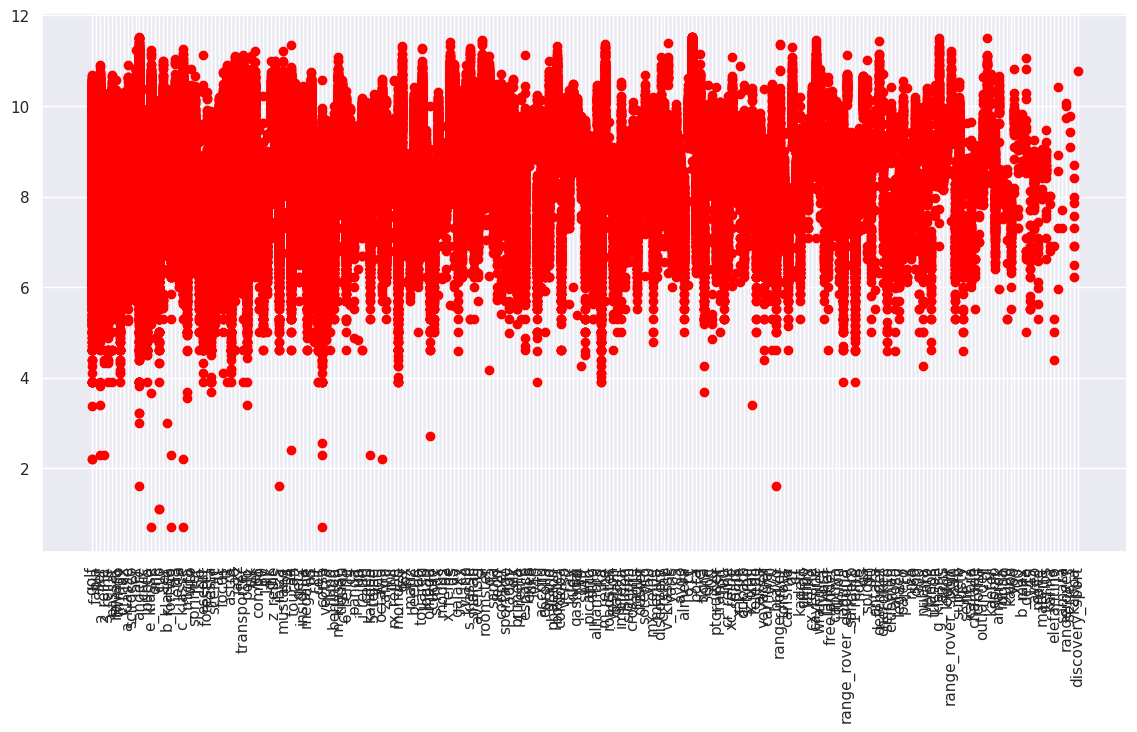

In [25]:
plt.figure(figsize=[14, 7])
plt.scatter(data['model'], target, color='red')
axes[i].tick_params(axis='x', rotation=45)
plt.tick_params(axis='x', rotation=90)

In [26]:
# 'powerPS', 'autoAgeMonths' logarithms
data['log_powerPS']=np.log(data['powerPS'])
data['log_autoAgeMonths']=np.log(data['autoAgeMonths'])

In [27]:
categorical = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'kilometer', 'brand']
numeric = ['log_powerPS', 'log_autoAgeMonths']
other = []

# YOUR CODE (EDA):

In [28]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [30]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

y = data['log_price'] #попробовать с price
X_train, X_temp, y_train, y_temp = train_test_split(x, y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [31]:
!pip install tqdm
from tqdm.auto import tqdm

Defaulting to user installation because normal site-packages is not writeable


In [107]:
from sklearn.metrics import mean_squared_error, r2_score

learning_rates = np.logspace(-3, 0, num=10)
display('Learning rates: ', learning_rates)

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

result = {}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    train_MSE = []
    train_R_squared = []
    val_MSE = []
    val_R_squared = []
    iterations = []
    loss_histories = []

    best_MSE = None
    
    descent_config['descent_name'] = descent_name
    
    for lr in tqdm(learning_rates, total=len(learning_rates), desc=f"Finding optimal learning rate for {descent_name.capitalize()} Gradient Descent."):
        descent_config['kwargs']['lambda_'] = lr
        descent_config['kwargs']['dimension'] = X_train.shape[1]
        
        model = LinearRegression(descent_config)
        
        model.fit(X_train, y_train)
   
        train_prediction = model.predict(X_train)
        val_prediction = model.predict(X_val)

        train_MSE.append(mean_squared_error(y_train, train_prediction))
        train_R_squared.append(r2_score(y_train, train_prediction))
        val_MSE.append(mean_squared_error(y_val, val_prediction))
        val_R_squared.append(r2_score(y_val, val_prediction))
        iterations.append(model.iteration)
        loss_histories.append(model.loss_history)
    best_MSE = min(val_MSE)
    best_MSE_index = val_MSE.index(best_MSE)
    best_lr = learning_rates[best_MSE_index]
    best_loss_history = loss_histories[best_MSE_index]

    result[descent_name] = {}
    result[descent_name]['MSE_train'] = train_MSE
    result[descent_name]['R^2_train'] = train_R_squared
    result[descent_name]['MSE_val'] = val_MSE
    result[descent_name]['R^2_val'] = val_R_squared
    result[descent_name]['best_MSE'] = best_MSE
    result[descent_name]['best_lr'] = best_lr
    result[descent_name]['amount_of_steps'] = iterations
    result[descent_name]['loss_histories'] = loss_histories
    result[descent_name]['loss_history_for_best'] = best_loss_history

'Learning rates: '

array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])

Finding optimal learning rate for Full Gradient Descent.:   0%|          | 0/10 [00:00<?, ?it/s]

Finding optimal learning rate for Stochastic Gradient Descent.:   0%|          | 0/10 [00:00<?, ?it/s]

Finding optimal learning rate for Momentum Gradient Descent.:   0%|          | 0/10 [00:00<?, ?it/s]

Finding optimal learning rate for Adam Gradient Descent.:   0%|          | 0/10 [00:00<?, ?it/s]

In [108]:
display(result)

{'full': {'MSE_train': [22.154325428883,
   9.13883627136209,
   4.773182981709099,
   1.7666165816759822,
   0.6968907474151342,
   0.6471206091460662,
   0.39850886179523315,
   0.3402514695278109,
   0.3146384003559381,
   0.2968540703112949],
  'R^2_train': [-16.47810918565345,
   -6.209859704075408,
   -2.7656851067399355,
   -0.39372862436441514,
   0.4502052155506556,
   0.4894701398492648,
   0.6856062523651958,
   0.7315669865879569,
   0.7517737864294928,
   0.7658042954292716],
  'MSE_val': [22.0831038978539,
   9.159159250732408,
   4.765232877755645,
   1.7589429729881134,
   0.7057066626412097,
   0.6414514382662316,
   0.3988374525409635,
   0.34278371408506675,
   0.31404702499552406,
   0.29705814983512746],
  'R^2_val': [-16.405780969419823,
   -6.219198918761451,
   -2.7559303312680368,
   -0.38638917188206334,
   0.4437658919955143,
   0.4944115062526879,
   0.6856385147015481,
   0.7298197628899108,
   0.7524698630928767,
   0.7658604010048691],
  'best_MSE': 0.297

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [35]:
descent_methods = ['full', 'stochastic', 'momentum', 'adam']

In [36]:
cmap = plt.get_cmap('PiYG')  
colors = [cmap(i / (len(descent_methods) - 1)) for i in range(len(descent_methods))]

In [120]:
result['full']['loss_history_for_best'][:18]

[695.3578941174824,
 7654.57992716306,
 57552.39161608416,
 317042.60996120435,
 1339472.9405660992,
 4479896.448111508,
 12138980.46404639,
 27122587.232302334,
 50664913.67027076,
 80002694.70688765,
 107750844.56134678,
 124699023.32018514,
 124765425.17112663,
 108476769.5515413,
 82309610.8108039,
 54700549.36263242,
 31934258.22624278,
 16417905.874549443]

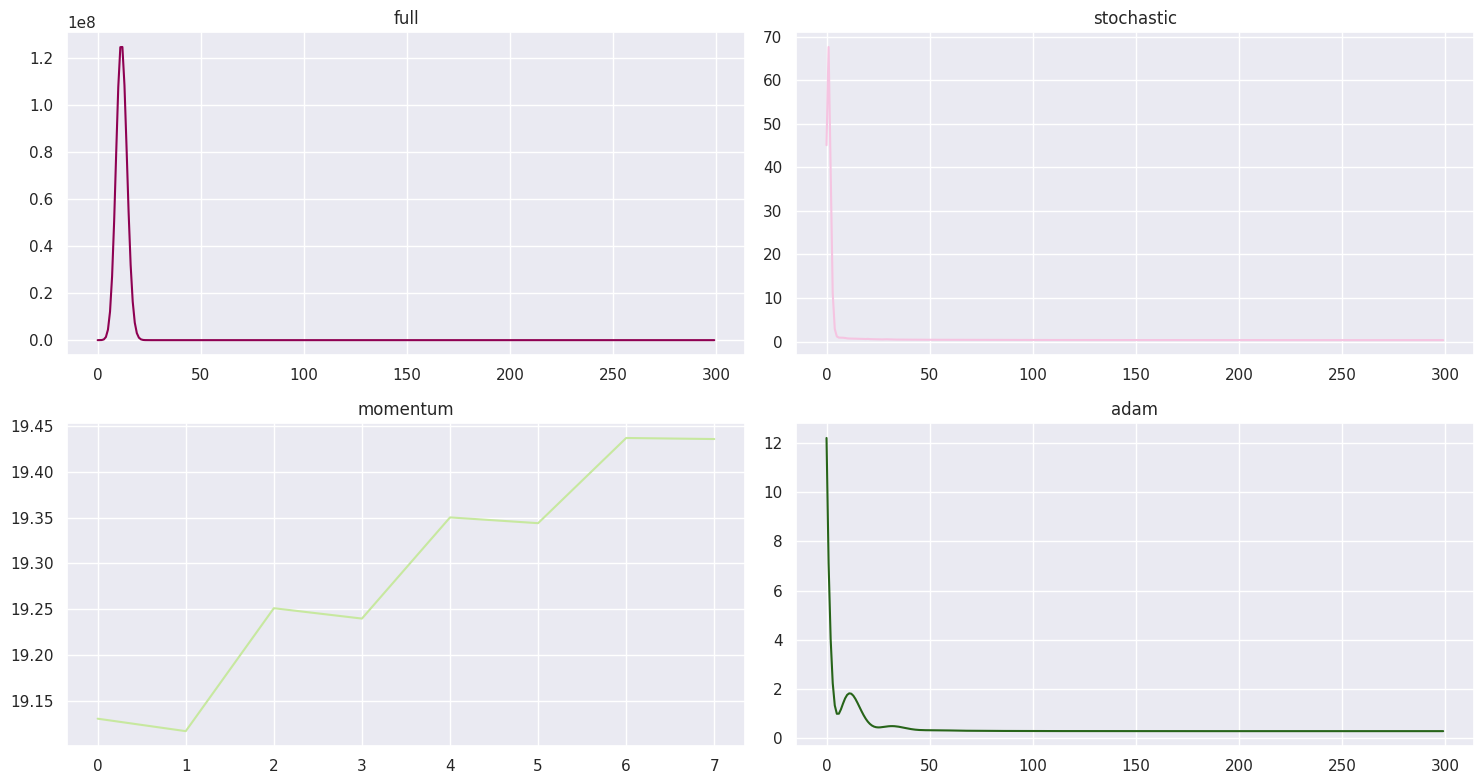

In [125]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()  

for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    MSE = result[descent_name]['loss_history_for_best']
    color=colors[i]
    axes[i].plot(range(len(MSE)), MSE, color=color)
    axes[i].set_title(descent_name)

plt.tight_layout()
plt.show()

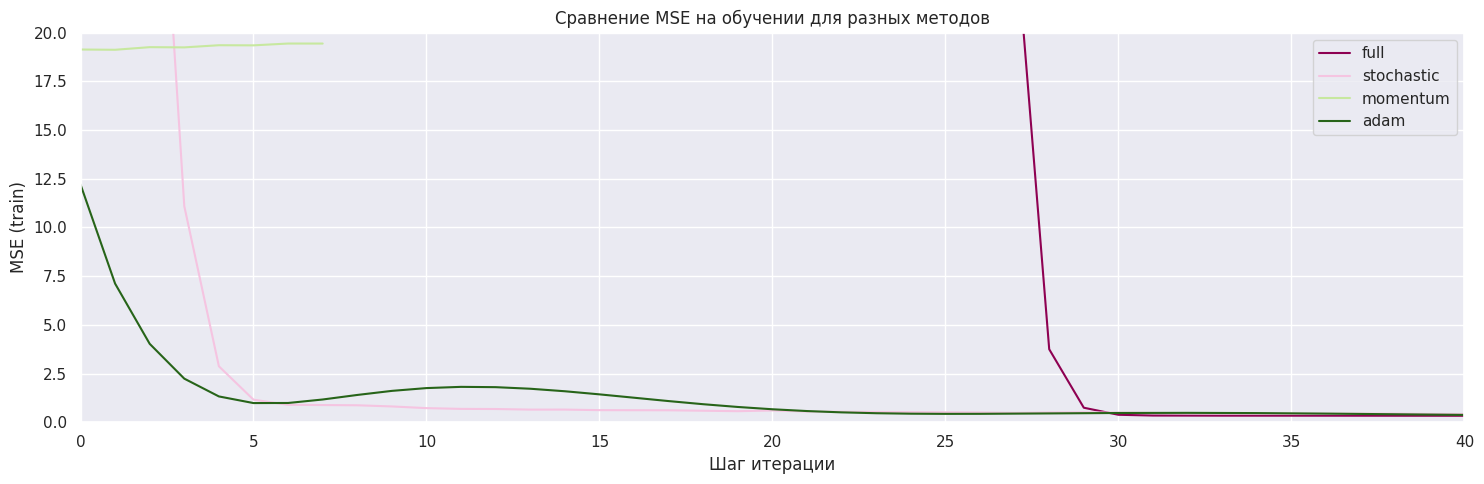

In [138]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(15, 5))

for i, descent_name in enumerate(descent_methods):
    MSE = result[descent_name]['loss_history_for_best']
    color = colors[i]  
    ax.plot(range(len(MSE)), MSE, label=descent_name, color=color)

ax.set_title('Сравнение MSE на обучении для разных методов')
ax.set_xlabel('Шаг итерации')
ax.set_ylabel('MSE (train)')
ax.set_ylim(0, 20)
ax.set_xlim(0, 40)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [73]:
import time

batch_sizes = np.arange(5, 500, 10)
k = 10

descent_config_stochastic = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

result_stochastic = {}

for size in batch_sizes:
    result_stochastic[size] = {}
    
    temp_avg_steps = 0
    temp_avg_time = 0
    
    for i in tqdm(range(k), total=k, desc=f"Repeating learning a model {k} times with batch size {size}."):
        descent_config_stochastic['kwargs']['batch_size'] = size
        model = LinearRegression(descent_config_stochastic, max_iter=5000, tolerance=5e-4)

        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()

        temp_avg_steps += model.iteration
        temp_avg_time += end_time - start_time

    result_stochastic[size]['avg_steps'] = temp_avg_steps/k
    result_stochastic[size]['avg_time'] = temp_avg_time/k
    print(result_stochastic[size])

Repeating learning a model 10 times with batch size 5.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 419.1, 'avg_time': 8.220011568069458}


Repeating learning a model 10 times with batch size 15.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 477.2, 'avg_time': 9.266748142242431}


Repeating learning a model 10 times with batch size 25.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 503.4, 'avg_time': 9.766697359085082}


Repeating learning a model 10 times with batch size 35.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 559.3, 'avg_time': 10.914212036132813}


Repeating learning a model 10 times with batch size 45.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 577.8, 'avg_time': 11.268282103538514}


Repeating learning a model 10 times with batch size 55.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 563.2, 'avg_time': 11.034143614768983}


Repeating learning a model 10 times with batch size 65.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 533.1, 'avg_time': 10.504788970947265}


Repeating learning a model 10 times with batch size 75.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 607.9, 'avg_time': 12.004497241973876}


Repeating learning a model 10 times with batch size 85.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 607.8, 'avg_time': 11.86765763759613}


Repeating learning a model 10 times with batch size 95.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 570.2, 'avg_time': 11.318864679336547}


Repeating learning a model 10 times with batch size 105.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 636.8, 'avg_time': 12.440338325500488}


Repeating learning a model 10 times with batch size 115.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 621.6, 'avg_time': 12.19972484111786}


Repeating learning a model 10 times with batch size 125.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 601.1, 'avg_time': 8.20145342350006}


Repeating learning a model 10 times with batch size 135.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 622.1, 'avg_time': 5.937099885940552}


Repeating learning a model 10 times with batch size 145.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 620.5, 'avg_time': 5.756120944023133}


Repeating learning a model 10 times with batch size 155.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 640.4, 'avg_time': 6.578790163993835}


Repeating learning a model 10 times with batch size 165.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 674.4, 'avg_time': 8.326975989341737}


Repeating learning a model 10 times with batch size 175.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 576.5, 'avg_time': 6.182865858078003}


Repeating learning a model 10 times with batch size 185.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 597.5, 'avg_time': 6.111023712158203}


Repeating learning a model 10 times with batch size 195.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 587.2, 'avg_time': 5.177784752845764}


Repeating learning a model 10 times with batch size 205.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 628.6, 'avg_time': 6.133695793151856}


Repeating learning a model 10 times with batch size 215.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 568.2, 'avg_time': 4.977770900726318}


Repeating learning a model 10 times with batch size 225.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 655.4, 'avg_time': 6.570437622070313}


Repeating learning a model 10 times with batch size 235.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 548.2, 'avg_time': 5.198615670204163}


Repeating learning a model 10 times with batch size 245.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 590.2, 'avg_time': 5.842074275016785}


Repeating learning a model 10 times with batch size 255.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 577.2, 'avg_time': 5.788159275054932}


Repeating learning a model 10 times with batch size 265.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 648.2, 'avg_time': 5.991152429580689}


Repeating learning a model 10 times with batch size 275.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 607.3, 'avg_time': 6.231962251663208}


Repeating learning a model 10 times with batch size 285.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 654.6, 'avg_time': 6.32927086353302}


Repeating learning a model 10 times with batch size 295.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 576.2, 'avg_time': 6.0922047138214115}


Repeating learning a model 10 times with batch size 305.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 629.4, 'avg_time': 7.920913982391357}


Repeating learning a model 10 times with batch size 315.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 598.6, 'avg_time': 6.429908657073975}


Repeating learning a model 10 times with batch size 325.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 623.6, 'avg_time': 7.029494380950927}


Repeating learning a model 10 times with batch size 335.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 607.7, 'avg_time': 7.262145519256592}


Repeating learning a model 10 times with batch size 345.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 648.0, 'avg_time': 7.351565027236939}


Repeating learning a model 10 times with batch size 355.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 659.3, 'avg_time': 6.588861250877381}


Repeating learning a model 10 times with batch size 365.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 652.5, 'avg_time': 7.727639889717102}


Repeating learning a model 10 times with batch size 375.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 542.3, 'avg_time': 5.40812656879425}


Repeating learning a model 10 times with batch size 385.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 614.8, 'avg_time': 7.2301394701004025}


Repeating learning a model 10 times with batch size 395.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 610.1, 'avg_time': 9.109543991088866}


Repeating learning a model 10 times with batch size 405.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 598.3, 'avg_time': 12.843701338768005}


Repeating learning a model 10 times with batch size 415.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 608.7, 'avg_time': 13.338463544845581}


Repeating learning a model 10 times with batch size 425.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 610.6, 'avg_time': 13.276768207550049}


Repeating learning a model 10 times with batch size 435.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 661.7, 'avg_time': 15.531183433532714}


Repeating learning a model 10 times with batch size 445.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 570.6, 'avg_time': 12.166400027275085}


Repeating learning a model 10 times with batch size 455.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 629.4, 'avg_time': 14.280042958259582}


Repeating learning a model 10 times with batch size 465.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 619.5, 'avg_time': 13.44800899028778}


Repeating learning a model 10 times with batch size 475.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 669.4, 'avg_time': 14.564042782783508}


Repeating learning a model 10 times with batch size 485.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 605.2, 'avg_time': 13.168333625793457}


Repeating learning a model 10 times with batch size 495.:   0%|          | 0/10 [00:00<?, ?it/s]

{'avg_steps': 639.9, 'avg_time': 14.545329117774964}


In [75]:
print(result_stochastic)

{5: {'avg_steps': 419.1, 'avg_time': 8.220011568069458}, 15: {'avg_steps': 477.2, 'avg_time': 9.266748142242431}, 25: {'avg_steps': 503.4, 'avg_time': 9.766697359085082}, 35: {'avg_steps': 559.3, 'avg_time': 10.914212036132813}, 45: {'avg_steps': 577.8, 'avg_time': 11.268282103538514}, 55: {'avg_steps': 563.2, 'avg_time': 11.034143614768983}, 65: {'avg_steps': 533.1, 'avg_time': 10.504788970947265}, 75: {'avg_steps': 607.9, 'avg_time': 12.004497241973876}, 85: {'avg_steps': 607.8, 'avg_time': 11.86765763759613}, 95: {'avg_steps': 570.2, 'avg_time': 11.318864679336547}, 105: {'avg_steps': 636.8, 'avg_time': 12.440338325500488}, 115: {'avg_steps': 621.6, 'avg_time': 12.19972484111786}, 125: {'avg_steps': 601.1, 'avg_time': 8.20145342350006}, 135: {'avg_steps': 622.1, 'avg_time': 5.937099885940552}, 145: {'avg_steps': 620.5, 'avg_time': 5.756120944023133}, 155: {'avg_steps': 640.4, 'avg_time': 6.578790163993835}, 165: {'avg_steps': 674.4, 'avg_time': 8.326975989341737}, 175: {'avg_steps':

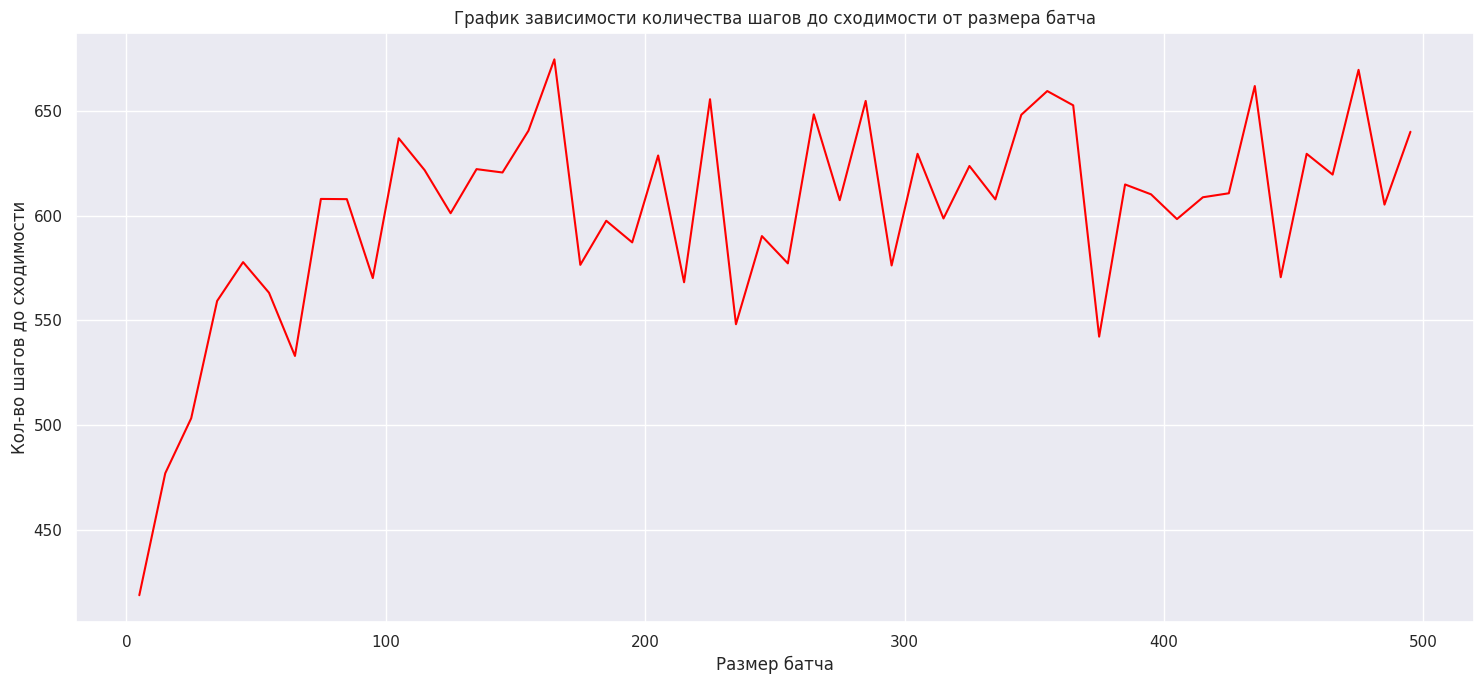

In [76]:
fig, ax = plt.subplots(figsize=(15, 7))
 
steps = [result_stochastic[size]['avg_steps'] for size in batch_sizes]
ax.plot(batch_sizes, steps, color='red')

ax.set_title('График зависимости количества шагов до сходимости от размера батча')
ax.set_xlabel('Размер батча')
ax.set_ylabel('Кол-во шагов до сходимости')

plt.tight_layout()
plt.show()

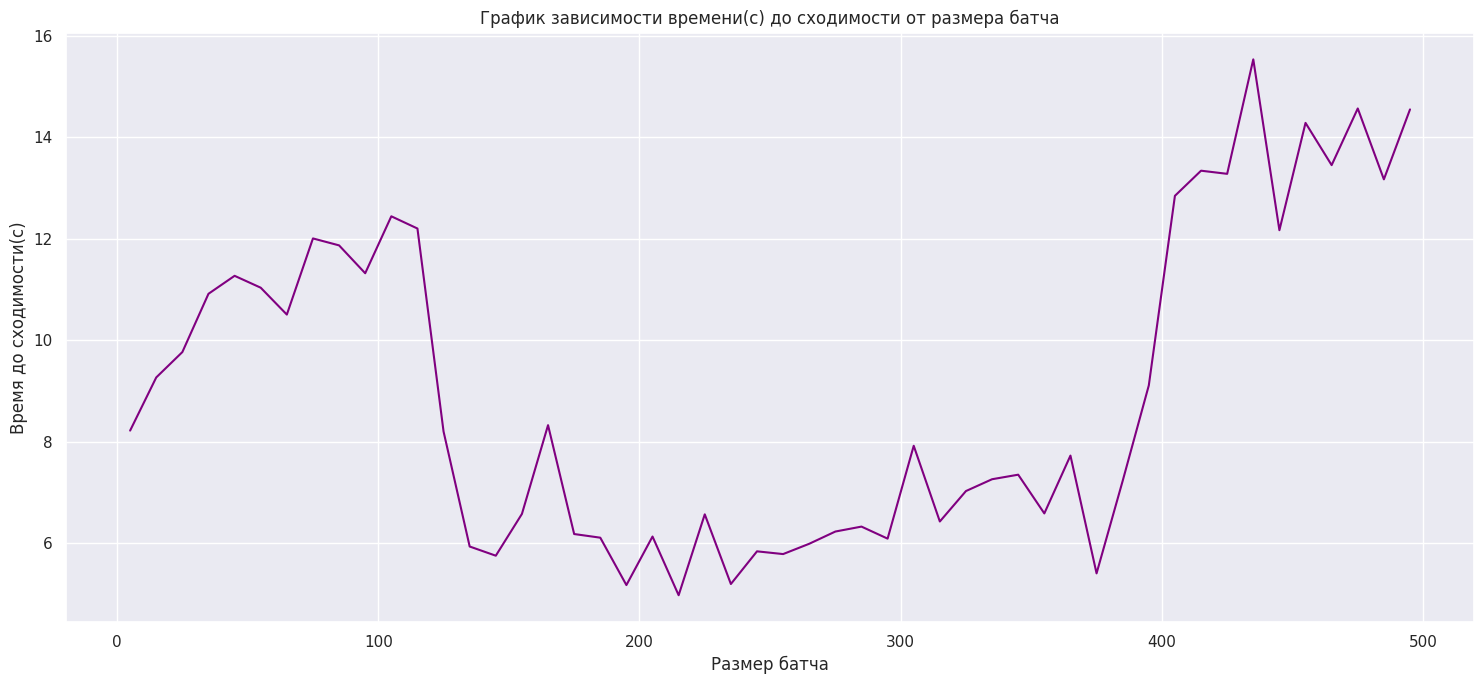

In [77]:
fig, ax = plt.subplots(figsize=(15, 7))

time = [result_stochastic[size]['avg_time'] for size in batch_sizes] 
ax.plot(batch_sizes, time, color='purple')

ax.set_title('График зависимости времени(с) до сходимости от размера батча')
ax.set_xlabel('Размер батча')
ax.set_ylabel('Время до сходимости(с)')

plt.tight_layout()
plt.show()

## Вывод

Оптимальный диапазон размера батча примерно в районе 100–200:

 - Количество шагов ещё не слишком большое.

 - Время до сходимости — наименьшее.

Это значит, что в этом диапазоне достигается баланс между "шумностью" градиентов и затратами на их вычисление.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [179]:
learning_rates_for_reg = np.logspace(-3, 0, num=10)
mu_range = np.logspace(-6, 1, 8)

print('Learning rates: ', learning_rates)
print('Reg terms: ', mu_range)

descent_config_for_reg = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

descent_names_reg = ['full', 'stochastic', 'momentum', 'adam']

result_reg = {}

for descent_name in descent_names_reg:
    result_reg[descent_name] = {}
    best_MSE = None
    for mu in mu_range:
        train_MSE = []
        train_R_squared = []
        val_MSE = []
        val_R_squared = []
        iterations = []
        loss_histories = []
        weights = []
        weights_for_best = []
    
        
        descent_config_for_reg['descent_name'] = descent_name
        descent_config_for_reg['kwargs']['mu'] = mu
        
        for lr in tqdm(learning_rates, total=len(learning_rates), desc=f"Finding optimal learning rate for {descent_name.capitalize()} Gradient Descent regularized with mu = {mu}."):
            descent_config_for_reg['kwargs']['lambda_'] = lr
            descent_config_for_reg['kwargs']['dimension'] = X_train.shape[1]
            
            model = LinearRegression(descent_config_for_reg)
            
            model.fit(X_train, y_train)
       
            train_prediction = model.predict(X_train)
            val_prediction = model.predict(X_val)
    
            train_MSE.append(mean_squared_error(y_train, train_prediction))
            train_R_squared.append(r2_score(y_train, train_prediction))
            val_MSE.append(mean_squared_error(y_val, val_prediction))
            val_R_squared.append(r2_score(y_val, val_prediction))
            iterations.append(model.iteration)
            loss_histories.append(model.loss_history)
            weights.append(model.descent.w)

        best_MSE = min(val_MSE)
        best_MSE_index = val_MSE.index(best_MSE)
        best_lr = learning_rates[best_MSE_index]
        r2_score_for_best = val_R_squared[best_MSE_index]
        iterations_for_best = iterations[best_MSE_index]
        loss_history_for_best = loss_histories[best_MSE_index]
        weights_for_best = weights[best_MSE_index]
        
        result_reg[descent_name][mu] = {}
        result_reg[descent_name][mu]['MSE_train'] = train_MSE
        result_reg[descent_name][mu]['R^2_train'] = train_R_squared
        result_reg[descent_name][mu]['MSE_val'] = val_MSE
        result_reg[descent_name][mu]['R^2_val'] = val_R_squared
        result_reg[descent_name][mu]['best_MSE'] = best_MSE
        result_reg[descent_name][mu]['best_lr'] = best_lr
        result_reg[descent_name][mu]['amount_of_steps'] = iterations
        result_reg[descent_name][mu]['R^2_val_for_best_MSE'] = r2_score_for_best
        result_reg[descent_name][mu]['iterations_for_best_MSE'] = iterations_for_best
        result_reg[descent_name][mu]['loss_history_for_best'] = loss_history_for_best
        result_reg[descent_name][mu]['weights'] = weights
        result_reg[descent_name][mu]['weights_for_best'] = weights_for_best

Learning rates:  [0.001      0.00215443 0.00464159 0.01       0.02154435 0.04641589
 0.1        0.21544347 0.46415888 1.        ]
Reg terms:  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


Finding optimal learning rate for Full Gradient Descent regularized with mu = 1e-06.:   0%|          | 0/10 [0…

Finding optimal learning rate for Full Gradient Descent regularized with mu = 1e-05.:   0%|          | 0/10 [0…

Finding optimal learning rate for Full Gradient Descent regularized with mu = 0.0001.:   0%|          | 0/10 […

Finding optimal learning rate for Full Gradient Descent regularized with mu = 0.001.:   0%|          | 0/10 [0…

Finding optimal learning rate for Full Gradient Descent regularized with mu = 0.01.:   0%|          | 0/10 [00…

Finding optimal learning rate for Full Gradient Descent regularized with mu = 0.1.:   0%|          | 0/10 [00:…

Finding optimal learning rate for Full Gradient Descent regularized with mu = 1.0.:   0%|          | 0/10 [00:…

Finding optimal learning rate for Full Gradient Descent regularized with mu = 10.0.:   0%|          | 0/10 [00…

Finding optimal learning rate for Stochastic Gradient Descent regularized with mu = 1e-06.:   0%|          | 0…

Finding optimal learning rate for Stochastic Gradient Descent regularized with mu = 1e-05.:   0%|          | 0…

Finding optimal learning rate for Stochastic Gradient Descent regularized with mu = 0.0001.:   0%|          | …

Finding optimal learning rate for Stochastic Gradient Descent regularized with mu = 0.001.:   0%|          | 0…

Finding optimal learning rate for Stochastic Gradient Descent regularized with mu = 0.01.:   0%|          | 0/…

Finding optimal learning rate for Stochastic Gradient Descent regularized with mu = 0.1.:   0%|          | 0/1…

Finding optimal learning rate for Stochastic Gradient Descent regularized with mu = 1.0.:   0%|          | 0/1…

Finding optimal learning rate for Stochastic Gradient Descent regularized with mu = 10.0.:   0%|          | 0/…

Finding optimal learning rate for Momentum Gradient Descent regularized with mu = 1e-06.:   0%|          | 0/1…

Finding optimal learning rate for Momentum Gradient Descent regularized with mu = 1e-05.:   0%|          | 0/1…

Finding optimal learning rate for Momentum Gradient Descent regularized with mu = 0.0001.:   0%|          | 0/…

Finding optimal learning rate for Momentum Gradient Descent regularized with mu = 0.001.:   0%|          | 0/1…

Finding optimal learning rate for Momentum Gradient Descent regularized with mu = 0.01.:   0%|          | 0/10…

Finding optimal learning rate for Momentum Gradient Descent regularized with mu = 0.1.:   0%|          | 0/10 …

Finding optimal learning rate for Momentum Gradient Descent regularized with mu = 1.0.:   0%|          | 0/10 …

Finding optimal learning rate for Momentum Gradient Descent regularized with mu = 10.0.:   0%|          | 0/10…

Finding optimal learning rate for Adam Gradient Descent regularized with mu = 1e-06.:   0%|          | 0/10 [0…

Finding optimal learning rate for Adam Gradient Descent regularized with mu = 1e-05.:   0%|          | 0/10 [0…

Finding optimal learning rate for Adam Gradient Descent regularized with mu = 0.0001.:   0%|          | 0/10 […

Finding optimal learning rate for Adam Gradient Descent regularized with mu = 0.001.:   0%|          | 0/10 [0…

Finding optimal learning rate for Adam Gradient Descent regularized with mu = 0.01.:   0%|          | 0/10 [00…

Finding optimal learning rate for Adam Gradient Descent regularized with mu = 0.1.:   0%|          | 0/10 [00:…

Finding optimal learning rate for Adam Gradient Descent regularized with mu = 1.0.:   0%|          | 0/10 [00:…

Finding optimal learning rate for Adam Gradient Descent regularized with mu = 10.0.:   0%|          | 0/10 [00…

In [183]:
best_results = {}

for descent_name in descent_names_reg:
    best_MSE = float('inf')
    best_mu = None
    best_lambda = None

    for mu in mu_range:
        current_result = result_reg[descent_name][mu]
        current_MSE = current_result['best_MSE']
        current_MSE_changes = current_result['MSE_train']
        current_r2_score = current_result['R^2_val_for_best_MSE']
        current_iterations = current_result['iterations_for_best_MSE']
        current_lambda = current_result['best_lr']
        current_loss_history_for_best = current_result['loss_history_for_best']
        # current_weights = current_result['weights']
        current_weights_for_best = current_result['weights_for_best']

        if current_MSE < best_MSE:
            best_MSE = current_MSE
            best_MSE_changes = current_MSE_changes
            best_r2_score = current_r2_score
            best_iterations = current_iterations
            best_mu = mu
            best_lambda = current_lambda
            best_iterations = current_iterations
            best_loss_history = current_loss_history_for_best
            best_weights = current_weights_for_best

    best_results[descent_name] = {
        'mu': best_mu,
        'lambda_': best_lambda,
        'best_MSE': best_MSE,
        'MSE_train': best_MSE_changes,
        'R^2_val': best_r2_score,
        'amount_of_steps': best_iterations,
        'loss_history_for_best': best_loss_history,
        'weights_for_best': best_weights,
    }


In [185]:
best_results['full']['weights_for_best']

array([ 0.75095927,  0.75969816,  0.97967875,  0.72719182,  0.62850658,
        0.43240735,  0.51910009,  0.79648838,  1.27975885,  1.24474294,
        0.35337858,  0.91810388,  0.81140019,  1.21308068,  0.95794573,
        0.26011949,  0.71238121,  1.29992309,  1.97870502,  0.42017472,
        0.6082648 ,  0.38324999,  0.71549602,  0.81351784,  0.84283699,
        0.85176823,  0.95276328,  0.9102759 ,  0.87791182,  0.80583323,
        0.71881963,  0.33248396,  0.7241749 ,  0.72173049,  0.69971554,
        0.1712527 ,  0.18801779,  0.40084882,  0.31277345,  0.10800417,
        0.74794173,  0.31081071,  0.3061781 ,  0.41894224,  0.18681315,
        0.68050656,  0.27415645,  0.56811165,  0.7060751 ,  0.19029007,
        0.799322  ,  0.32589004,  0.7281366 ,  0.72357116,  0.14779801,
        0.55128122,  0.3700544 ,  0.33282468,  0.88623373,  0.22610525,
        0.754398  ,  0.54394962,  0.39183431,  0.80163286,  0.51516505,
        0.14944822,  0.52341325,  0.56723918,  0.70532627,  0.63

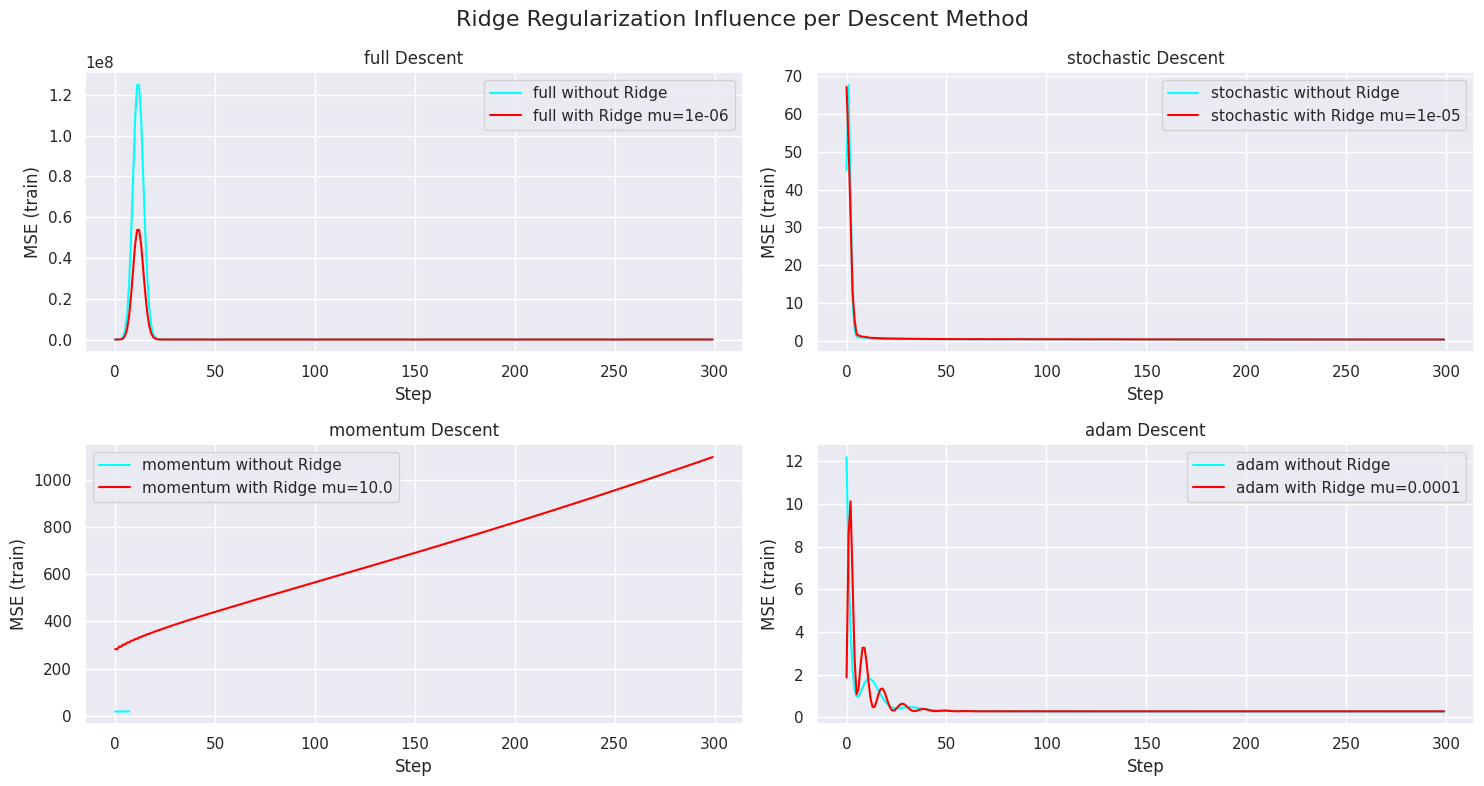

In [181]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten() 

for i, descent_name in enumerate(descent_methods):
    MSE = result[descent_name]['loss_history_for_best']
    MSE_reg = best_results[descent_name]['loss_history_for_best']
    mu = best_results[descent_name]['mu']
    
    ax = axes[i]
    
    ax.plot(range(len(MSE)), MSE, label=f'{descent_name} without Ridge', color='cyan')
    ax.plot(range(len(MSE_reg)), MSE_reg, label=f'{descent_name} with Ridge mu={mu}', color='red')
    
    ax.set_title(f'{descent_name} Descent')
    ax.set_xlabel('Step')
    ax.set_ylabel('MSE (train)')

    ax.legend()
    ax.grid(True)

plt.suptitle('Ridge Regularization Influence per Descent Method', fontsize=16)
plt.tight_layout() 
plt.show()


## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`tanh(a−y)`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [187]:
from sklearn.metrics import mean_squared_error, r2_score
from descents import LossFunction, get_descent

learning_rates = np.logspace(-3, 0, num=10)
display('Learning rates: ', learning_rates)

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': X_train.shape[1]
    },
    'loss_function': LossFunction.LogCosh,
}

result_logcosh = {}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    train_MSE = []
    train_R_squared = []
    val_MSE = []
    val_R_squared = []
    iterations = []
    loss_histories = []

    best_MSE = None
    
    descent_config['descent_name'] = descent_name
    
    for lr in tqdm(learning_rates, total=len(learning_rates), desc=f"Finding optimal learning rate for {descent_name.capitalize()} Gradient Descent."):
        descent_config['kwargs']['lambda_'] = lr
        descent_config['kwargs']['dimension'] = X_train.shape[1]
        
        model = LinearRegression(descent_config)
        
        model.fit(X_train, y_train)
   
        train_prediction = model.predict(X_train)
        val_prediction = model.predict(X_val)

        train_MSE.append(mean_squared_error(y_train, train_prediction))
        train_R_squared.append(r2_score(y_train, train_prediction))
        val_MSE.append(mean_squared_error(y_val, val_prediction))
        val_R_squared.append(r2_score(y_val, val_prediction))
        iterations.append(model.iteration)
        loss_histories.append(model.loss_history)
    best_MSE = min(val_MSE)
    best_MSE_index = val_MSE.index(best_MSE)
    best_lr = learning_rates[best_MSE_index]
    best_loss_history = loss_histories[best_MSE_index]

    result_logcosh[descent_name] = {}
    result_logcosh[descent_name]['MSE_train'] = train_MSE
    result_logcosh[descent_name]['R^2_train'] = train_R_squared
    result_logcosh[descent_name]['MSE_val'] = val_MSE
    result_logcosh[descent_name]['R^2_val'] = val_R_squared
    result_logcosh[descent_name]['best_MSE'] = best_MSE
    result_logcosh[descent_name]['best_lr'] = best_lr
    result_logcosh[descent_name]['amount_of_steps'] = iterations
    result_logcosh[descent_name]['loss_histories'] = loss_histories
    result_logcosh[descent_name]['loss_history_for_best'] = best_loss_history

'Learning rates: '

array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])

Finding optimal learning rate for Full Gradient Descent.:   0%|          | 0/10 [00:00<?, ?it/s]

Finding optimal learning rate for Stochastic Gradient Descent.:   0%|          | 0/10 [00:00<?, ?it/s]

Finding optimal learning rate for Momentum Gradient Descent.:   0%|          | 0/10 [00:00<?, ?it/s]

Finding optimal learning rate for Adam Gradient Descent.:   0%|          | 0/10 [00:00<?, ?it/s]

In [188]:
display(result_logcosh)

{'full': {'MSE_train': [16.890914673628437,
   7.175739417192446,
   5.573181181364922,
   1.9124321614775408,
   0.9379160102351904,
   0.6667203912144498,
   0.47794578966746004,
   0.3374868231568957,
   0.32189248185790753,
   0.2933205633109109],
  'R^2_train': [-12.325670955719938,
   -4.661122809813772,
   -3.3968239751652174,
   -0.508766233291942,
   0.2600542730815325,
   0.47400737470636356,
   0.6229364453705957,
   0.7337480862240389,
   0.7460508575621685,
   0.7685919687149798],
  'MSE_val': [16.871665058267197,
   7.223611447781587,
   5.6020834456314725,
   1.9056991014645954,
   0.9459479311437107,
   0.6626498411733939,
   0.47762809571279324,
   0.33879525476190475,
   0.32092047504749005,
   0.2942149072714094],
  'R^2_val': [-12.29815355449882,
   -4.693610791755545,
   -3.4155313436962222,
   -0.502061544751256,
   0.254409046204625,
   0.4777030417356398,
   0.6235361633368082,
   0.732963444580017,
   0.747052247586372,
   0.7681014291472861],
  'best_MSE': 0.2

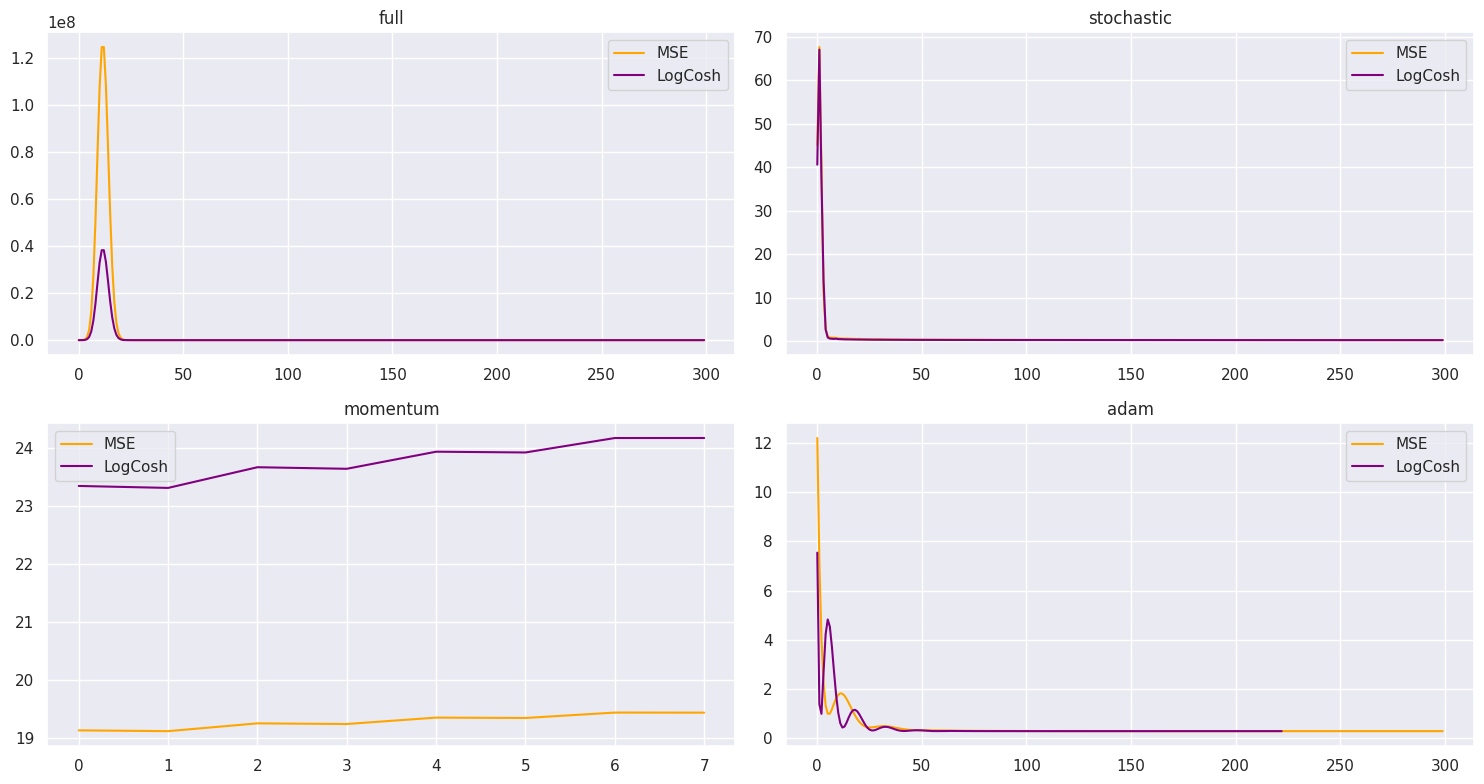

In [195]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()  

for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    MSE = result[descent_name]['loss_history_for_best']
    logcosh = result_logcosh[descent_name]['loss_history_for_best']
    color=colors[i]
    axes[i].plot(range(len(MSE)), MSE, color='orange', label='MSE')
    axes[i].plot(range(len(logcosh)), logcosh, color='purple', label='LogCosh')
    axes[i].set_title(descent_name)
    axes[i].legend()

plt.tight_layout()
plt.show()

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: